## Quadratic Assignment Problem (data)

In [9]:
file_path = "../qapdata/chr12a.dat"


In [10]:
import numpy as np
from docplex.mp.model import Model

def parse_qap_dat_file(file_path):
    """
    Parses a .dat file for the Quadratic Assignment Problem (QAP).

    Parameters:
    - file_path: str, path to the .dat file.

    Returns:
    - n: int, the size of the problem (number of facilities/locations).
    - A: 2D numpy array, flow matrix.
    - B: 2D numpy array, distance matrix.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Read the size of the problem
    n = int(lines[0].strip())

    # Read the flow matrix (A)
    A = []
    current_line = 1
    for i in range(n):
        row = list(map(int, lines[current_line].strip().split()))
        while len(row) < n:  # Handle cases where rows are split across multiple lines
            current_line += 1
            row.extend(list(map(int, lines[current_line].strip().split())))
        A.append(row[:n])
        current_line += 1

    # Read the distance matrix (B)
    B = []
    for i in range(n):
        row = list(map(int, lines[current_line].strip().split()))
        while len(row) < n:  # Handle cases where rows are split across multiple lines
            current_line += 1
            row.extend(list(map(int, lines[current_line].strip().split())))
        B.append(row[:n])
        current_line += 1

    return n, np.array(A), np.array(B)

def create_qap_model(n, A, B):
    """
    Creates a CPLEX model for the Quadratic Assignment Problem (QAP).

    Parameters:
    - n: int, the size of the problem (number of facilities/locations).
    - A: 2D numpy array, flow matrix.
    - B: 2D numpy array, distance matrix.

    Returns:
    - model: CPLEX model.
    - x: 2D list of CPLEX binary variables representing the assignment.
    """
    # Create a CPLEX model
    model = Model(name="Quadratic Assignment Problem")

    # Decision variables: x[i][j] = 1 if facility i is assigned to location j
    x = [[model.binary_var(name=f"x_{i}_{j}") for j in range(n)] for i in range(n)]

    # Objective: Minimize the total cost
    model.minimize(
        model.sum(A[i, k] * B[j, l] * x[i][j] * x[k][l]
                  for i in range(n) for j in range(n) for k in range(n) for l in range(n))
    )

    # Constraints: Each facility is assigned to exactly one location
    for i in range(n):
        model.add_constraint(model.sum(x[i][j] for j in range(n)) == 1, f"facility_assignment_{i}")

    # Constraints: Each location is assigned exactly one facility
    for j in range(n):
        model.add_constraint(model.sum(x[i][j] for i in range(n)) == 1, f"location_assignment_{j}")

    return model, x

# Example usage
if __name__ == "__main__":
    file_path = file_path  # Replace with the path to your .dat file

    # Parse the .dat file
    n, A, B = parse_qap_dat_file(file_path)

    # Create the QAP model
    model, x = create_qap_model(n, A, B)
    print(model.export_to_string())
    # Solve the model
    # solution = model.solve()

    # if solution:
    #     print("Optimal value (total cost):", solution.objective_value)
    #     assignment = [(i, j) for i in range(n) for j in range(n) if x[i][j].solution_value > 0.5]
    #     print("Optimal assignment:", assignment)
    # else:
    #     print("No solution found.")


\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Quadratic Assignment Problem

Minimize
 obj: [ 12960 x_0_0*x_1_1 + 19440 x_0_0*x_1_2 + 9360 x_0_0*x_1_3
      + 21240 x_0_0*x_1_4 + 25920 x_0_0*x_1_5 + 3240 x_0_0*x_1_6
      + 12240 x_0_0*x_1_7 + 28440 x_0_0*x_1_8 + 6120 x_0_0*x_1_9
      + 16560 x_0_0*x_1_10 + 34200 x_0_0*x_1_11 + 1440 x_0_0*x_2_1
      + 2160 x_0_0*x_2_2 + 1040 x_0_0*x_2_3 + 2360 x_0_0*x_2_4
      + 2880 x_0_0*x_2_5 + 360 x_0_0*x_2_6 + 1360 x_0_0*x_2_7 + 3160 x_0_0*x_2_8
      + 680 x_0_0*x_2_9 + 1840 x_0_0*x_2_10 + 3800 x_0_0*x_2_11
      + 3312 x_0_0*x_3_1 + 4968 x_0_0*x_3_2 + 2392 x_0_0*x_3_3
      + 5428 x_0_0*x_3_4 + 6624 x_0_0*x_3_5 + 828 x_0_0*x_3_6 + 3128 x_0_0*x_3_7
      + 7268 x_0_0*x_3_8 + 1564 x_0_0*x_3_9 + 4232 x_0_0*x_3_10
      + 8740 x_0_0*x_3_11 + 6192 x_0_0*x_4_1 + 9288 x_0_0*x_4_2
      + 4472 x_0_0*x_4_3 + 10148 x_0_0*x_4_4 + 12384 x_0_0*x_4_5
      + 1548 x_0_0*x_4_6 + 5848 x_0_0*x_4_7 + 13588 x_0_0*x_4_8
      + 292

In [11]:
# print the model
print(model.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Quadratic Assignment Problem

Minimize
 obj: [ 12960 x_0_0*x_1_1 + 19440 x_0_0*x_1_2 + 9360 x_0_0*x_1_3
      + 21240 x_0_0*x_1_4 + 25920 x_0_0*x_1_5 + 3240 x_0_0*x_1_6
      + 12240 x_0_0*x_1_7 + 28440 x_0_0*x_1_8 + 6120 x_0_0*x_1_9
      + 16560 x_0_0*x_1_10 + 34200 x_0_0*x_1_11 + 1440 x_0_0*x_2_1
      + 2160 x_0_0*x_2_2 + 1040 x_0_0*x_2_3 + 2360 x_0_0*x_2_4
      + 2880 x_0_0*x_2_5 + 360 x_0_0*x_2_6 + 1360 x_0_0*x_2_7 + 3160 x_0_0*x_2_8
      + 680 x_0_0*x_2_9 + 1840 x_0_0*x_2_10 + 3800 x_0_0*x_2_11
      + 3312 x_0_0*x_3_1 + 4968 x_0_0*x_3_2 + 2392 x_0_0*x_3_3
      + 5428 x_0_0*x_3_4 + 6624 x_0_0*x_3_5 + 828 x_0_0*x_3_6 + 3128 x_0_0*x_3_7
      + 7268 x_0_0*x_3_8 + 1564 x_0_0*x_3_9 + 4232 x_0_0*x_3_10
      + 8740 x_0_0*x_3_11 + 6192 x_0_0*x_4_1 + 9288 x_0_0*x_4_2
      + 4472 x_0_0*x_4_3 + 10148 x_0_0*x_4_4 + 12384 x_0_0*x_4_5
      + 1548 x_0_0*x_4_6 + 5848 x_0_0*x_4_7 + 13588 x_0_0*x_4_8
      + 292

In [12]:
import os
import json
import numpy as np
from docplex.mp.model import Model
import io
import time
import os
import json
import sys
import numpy as np
from docplex.mp.model import Model
from qiskit_optimization.translators import from_docplex_mp
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit.primitives import StatevectorEstimator, StatevectorSampler

estimator = StatevectorEstimator()

In [5]:
qp = from_docplex_mp(model)
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Quadratic Assignment Problem

Minimize
 obj: [ 12960 x_0_0*x_1_1 + 19440 x_0_0*x_1_2 + 9360 x_0_0*x_1_3
      + 21240 x_0_0*x_1_4 + 25920 x_0_0*x_1_5 + 3240 x_0_0*x_1_6
      + 12240 x_0_0*x_1_7 + 28440 x_0_0*x_1_8 + 6120 x_0_0*x_1_9
      + 16560 x_0_0*x_1_10 + 34200 x_0_0*x_1_11 + 1440 x_0_0*x_2_1
      + 2160 x_0_0*x_2_2 + 1040 x_0_0*x_2_3 + 2360 x_0_0*x_2_4
      + 2880 x_0_0*x_2_5 + 360 x_0_0*x_2_6 + 1360 x_0_0*x_2_7 + 3160 x_0_0*x_2_8
      + 680 x_0_0*x_2_9 + 1840 x_0_0*x_2_10 + 3800 x_0_0*x_2_11
      + 3312 x_0_0*x_3_1 + 4968 x_0_0*x_3_2 + 2392 x_0_0*x_3_3
      + 5428 x_0_0*x_3_4 + 6624 x_0_0*x_3_5 + 828 x_0_0*x_3_6 + 3128 x_0_0*x_3_7
      + 7268 x_0_0*x_3_8 + 1564 x_0_0*x_3_9 + 4232 x_0_0*x_3_10
      + 8740 x_0_0*x_3_11 + 6192 x_0_0*x_4_1 + 9288 x_0_0*x_4_2
      + 4472 x_0_0*x_4_3 + 10148 x_0_0*x_4_4 + 12384 x_0_0*x_4_5
      + 1548 x_0_0*x_4_6 + 5848 x_0_0*x_4_7 + 13588 x_0_0*x_4_8
      + 292

In [6]:
converter = QuadraticProgramToQubo()
qubo = converter.convert(qp)

print(qubo.export_as_lp_string())


\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Quadratic Assignment Problem

Minimize
 obj: - 23823940 x_0_0 - 23823940 x_0_1 - 23823940 x_0_2 - 23823940 x_0_3
      - 23823940 x_0_4 - 23823940 x_0_5 - 23823940 x_0_6 - 23823940 x_0_7
      - 23823940 x_0_8 - 23823940 x_0_9 - 23823940 x_0_10 - 23823940 x_0_11
      - 23823940 x_1_0 - 23823940 x_1_1 - 23823940 x_1_2 - 23823940 x_1_3
      - 23823940 x_1_4 - 23823940 x_1_5 - 23823940 x_1_6 - 23823940 x_1_7
      - 23823940 x_1_8 - 23823940 x_1_9 - 23823940 x_1_10 - 23823940 x_1_11
      - 23823940 x_2_0 - 23823940 x_2_1 - 23823940 x_2_2 - 23823940 x_2_3
      - 23823940 x_2_4 - 23823940 x_2_5 - 23823940 x_2_6 - 23823940 x_2_7
      - 23823940 x_2_8 - 23823940 x_2_9 - 23823940 x_2_10 - 23823940 x_2_11
      - 23823940 x_3_0 - 23823940 x_3_1 - 23823940 x_3_2 - 23823940 x_3_3
      - 23823940 x_3_4 - 23823940 x_3_5 - 23823940 x_3_6 - 23823940 x_3_7
      - 23823940 x_3_8 - 23823940 x_3_9 - 23823940 x_3_10 - 23

In [7]:
# number of variables
num_vars = qubo.get_num_vars()
print('Number of variables:', num_vars)


Number of variables: 144


In [22]:
sys.path.append(os.path.abspath(os.path.join('../..')))
from pce_qubo.pauli_correlation_encoding import PauliCorrelationEncoding
from pce_qubo.mixed_optimize import PauliCorrelationOptimizer

from pce_qubo.utility import Utility
from qiskit.quantum_info import SparsePauliOp, Statevector

In [23]:
pauli_encoder = PauliCorrelationEncoding()
k = 2
num_qubits = pauli_encoder.find_n(num_vars, k)
pauli_strings = SparsePauliOp(pauli_encoder.generate_pauli_strings(num_qubits, num_vars, k))
print(f"Number of qubits: {num_qubits} for k={k} with {num_vars} binary variables")

Number of qubits: 11 for k=2 with 144 binary variables


In [24]:
from qiskit_algorithms.optimizers import ADAM, POWELL, SLSQP, COBYLA, P_BFGS

In [25]:
# Initial setup
depth = 2 * num_qubits
ansatz = pauli_encoder.BrickWork(depth=depth, num_qubits=num_qubits)
optimizer = SLSQP(10) #P_BFGS() #
# optimizer = POWELL()

In [26]:
pce = PauliCorrelationOptimizer(pauli_encoder=pauli_encoder, depth = depth,qubo=qubo, k=k,
                                num_qubits=num_qubits)

INFO:__main__:Step 1: Initializing parameters and variables.
INFO:__main__:Using SLSQP optimizer.
INFO:__main__:Early stopping configured with fixed_threshold=50 and percentage_threshold=0.10%.
INFO:__main__:
--- Round 1 ---
INFO:__main__:Assigning optimized parameters to the ansatz...
INFO:__main__:Evaluating the QUBO cost and bitstring...
INFO:__main__:QUBO cost for this round: 3730034080.0
INFO:__main__:Market share cost: 1587470.0
INFO:__main__:Initial feasibility: (False, [], [<LinearConstraint: x_0_0 + x_0_1 + x_0_10 + x_0_11 + x_0_2 + x_0_3 + ... == 1 'facility_assignment_0'>, <LinearConstraint: x_1_0 + x_1_1 + x_1_10 + x_1_11 + x_1_2 + x_1_3 + ... == 1 'facility_assignment_1'>, <LinearConstraint: x_2_0 + x_2_1 + x_2_10 + x_2_11 + x_2_2 + x_2_3 + ... == 1 'facility_assignment_2'>, <LinearConstraint: x_3_0 + x_3_1 + x_3_10 + x_3_11 + x_3_2 + x_3_3 + ... == 1 'facility_assignment_3'>, <LinearConstraint: x_4_0 + x_4_1 + x_4_10 + x_4_11 + x_4_2 + x_4_3 + ... == 1 'facility_assignmen

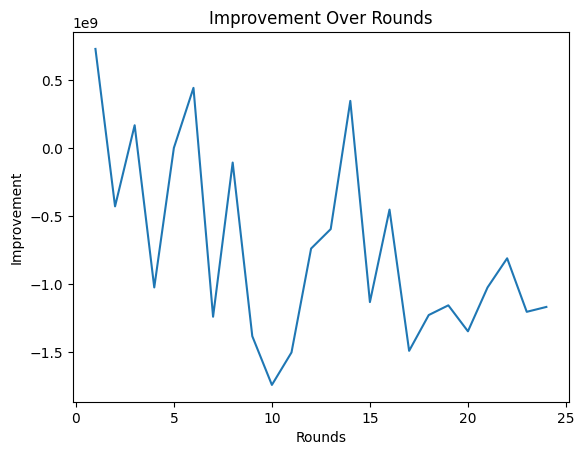

In [27]:
import numpy as np
import logging
import matplotlib.pyplot as plt
import pickle

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Functions
def adaptive_perturbation(params, perturbation_factor, failure_count, historical_trend, max_factor=1e-2):
    """Adds directional and random perturbation based on historical trends."""
    random_perturbation = np.random.normal(0, perturbation_factor * (1 + failure_count / 5), size=params.shape)
    directional_perturbation = perturbation_factor * np.sign(historical_trend)
    return params + random_perturbation + directional_perturbation

def weighted_blended_initialization(previous_params, performance_weights, blend_factor=0.7):
    """Blends previous parameters with random ones, weighted by performance."""
    random_params = np.random.rand(len(previous_params))
    weighted_params = performance_weights * previous_params
    return blend_factor * weighted_params + (1 - blend_factor) * random_params

def initialize_within_range(num_params, lower_bound=-np.pi, upper_bound=np.pi):
    """Initializes parameters uniformly within a specified range."""
    return np.random.uniform(lower_bound, upper_bound, size=num_params)

def history_based_cooling_schedule(temperature, alpha, improvement_history, window=5):
    """Dynamically adjusts cooling based on recent improvement trends."""
    if len(improvement_history) >= window:
        recent_trend = sum(improvement_history[-window:])
        if recent_trend > 0:
            alpha = min(alpha * 1.05, 0.99)
        else:
            alpha = max(alpha * 0.95, 0.8)
    return max(temperature * alpha, 1e-8)

def save_checkpoint(filename, params, cost, round_num):
    """Saves the current state of optimization."""
    checkpoint = {'params': params, 'cost': cost, 'round_num': round_num}
    with open(filename, 'wb') as f:
        pickle.dump(checkpoint, f)

def load_checkpoint(filename):
    """Loads a saved optimization state."""
    with open(filename, 'rb') as f:
        return pickle.load(f)

def evaluate_perturbed_params(params, perturbation_factor, optimizer, pce, no_improvement_count, historical_trend):
    """Evaluate a perturbed parameter set and return both parameters and QUBO cost."""
    perturbed_params = adaptive_perturbation(params, perturbation_factor, no_improvement_count, historical_trend)
    optimized_params = pce.optimize(optimizer, perturbed_params)  # Perform optimization

    # Evaluate the QUBO cost for the optimized parameters
    final_ansatz = pauli_encoder.BrickWork(depth=depth, num_qubits=num_qubits).assign_parameters(optimized_params)
    psi_final = Statevector(final_ansatz)
    utility = Utility()
    qubo_bitstring = utility.evaluate_sign_function(psi_final, pauli_strings)
    qubo_cost = qubo.objective.evaluate(qubo_bitstring)

    return optimized_params, qubo_cost

# Initialization
logger.info("Step 1: Initializing parameters and variables.")
params = initialize_within_range(ansatz.num_parameters)
best_params = params.copy()  # Store the best parameters
best_qubo_cost = float('inf')  # Initialize best QUBO cost to infinity
best_qubo_bitstring = None  # Initialize best QUBO bitstring
no_improvement_count = 0  # Counter for consecutive rounds without improvement
max_no_improvement_rounds = 10  # Stop after 10 consecutive rounds without improvement
perturbation_factor = 1e-4  # Initial perturbation factor
decay_factor = 0.99  # Decay factor for perturbation
early_stopping_threshold = 1e-6  # Threshold for minimal improvement
fixed_threshold = 50  # Fixed improvement threshold
percentage_threshold = 0.001  # 0.1% of the best QUBO cost
improvement_history = []  # Track improvements for plotting
cumulative_improvement = 0  # Track cumulative improvement
historical_trend = np.zeros_like(params)  # Track parameter improvement trend
performance_weights = np.ones_like(params)  # Initialize performance weights

# Logging optimizer information
logger.info(f"Using {optimizer.__class__.__name__} optimizer.")
logger.info(f"Early stopping configured with fixed_threshold={fixed_threshold} and percentage_threshold={percentage_threshold * 100:.2f}%.")

round_num = 0
last_improvement_round = 0  # Track the round where the last significant improvement occurred

while no_improvement_count < max_no_improvement_rounds:
    round_num += 1
    logger.info(f"\n--- Round {round_num} ---")

    # Evaluate perturbations sequentially
    best_parallel_cost = float('inf')
    best_result = None

    for _ in range(4):  # Evaluate 4 perturbations sequentially
        result, qubo_cost = evaluate_perturbed_params(
            params, perturbation_factor, optimizer, pce, no_improvement_count, historical_trend
        )
        if qubo_cost < best_parallel_cost:
            best_parallel_cost = qubo_cost
            best_result = result

    result = best_result  # Use the best result from evaluations

    # Prepare the ansatz with the optimized parameters
    logger.info("Assigning optimized parameters to the ansatz...")
    final_ansatz = pauli_encoder.BrickWork(depth=depth, num_qubits=num_qubits).assign_parameters(result)
    psi_final = Statevector(final_ansatz)

    # Evaluate the QUBO cost and bitstring
    logger.info("Evaluating the QUBO cost and bitstring...")
    utility = Utility()
    qubo_bitstring = utility.evaluate_sign_function(psi_final, pauli_strings)
    qubo_cost = qubo.objective.evaluate(qubo_bitstring)
    logger.info(f"QUBO cost for this round: {qubo_cost}")
    market_share_bitstring = converter.interpret(qubo_bitstring)
    initial_feasible = qp.get_feasibility_info(market_share_bitstring)
    market_share_cost = qp.objective.evaluate(market_share_bitstring)
    logger.info(f"Market share cost: {market_share_cost}")
    logger.info(f"Initial feasibility: {initial_feasible}")

    # Check if the QUBO cost improved
    improvement = best_qubo_cost - qubo_cost
    improvement_history.append(improvement)
    cumulative_improvement += improvement
    historical_trend = np.sign(result - params) * improvement

    # Calculate dynamic threshold
    dynamic_threshold = max(fixed_threshold, percentage_threshold * best_qubo_cost)

    # Check if |qubo_cost| equals market_share_cost
    if abs(qubo_cost) == market_share_cost:
        logger.info(f"Stopping condition met: |QUBO cost| equals Market Share Cost.")
        logger.info(f"Final QUBO cost: {qubo_cost}, Market Share Cost: {market_share_cost}.")
        break

    if qubo_cost < best_qubo_cost:
        logger.info(f"Improvement detected! Previous best QUBO cost: {best_qubo_cost}, Current QUBO cost: {qubo_cost}")
        best_qubo_cost = qubo_cost
        best_params = result.copy()  # Save the best parameters
        best_qubo_bitstring = qubo_bitstring.copy()  # Save the best bitstring
        no_improvement_count = 0  # Reset no improvement counter
        perturbation_factor *= decay_factor  # Decay perturbation factor for precision
        last_improvement_round = round_num  # Update last improvement round

        # Perturb the trained parameters slightly
        logger.info("Perturbing the best parameters slightly for the next round.")
        params = adaptive_perturbation(best_params, perturbation_factor, no_improvement_count, historical_trend)
    else:
        logger.info(f"No improvement this round. Previous best QUBO cost remains: {best_qubo_cost}")
        no_improvement_count += 1

        # Apply perturbation or blended initialization
        if no_improvement_count % 2 == 0:
            logger.info("Applying blended initialization to explore new solutions.")
            params = weighted_blended_initialization(best_params, performance_weights)
        else:
            logger.info("Applying stronger perturbation to the best parameters.")
            params = adaptive_perturbation(best_params, perturbation_factor * 2, no_improvement_count, historical_trend)

    # Stop if no improvement for max_no_improvement_rounds consecutive rounds
    rounds_remaining = max_no_improvement_rounds - no_improvement_count
    logger.info(f"Consecutive no-improvement rounds: {no_improvement_count}. Rounds remaining before stopping: {rounds_remaining}.")

    if no_improvement_count >= max_no_improvement_rounds:
        logger.info(f"No improvement detected for {max_no_improvement_rounds} consecutive rounds.")
        logger.info(f"Early stopping triggered at round {round_num}.")
        break

    # Save checkpoints
    save_checkpoint("optimization_checkpoint.pkl", best_params, best_qubo_cost, round_num)

# Final Results
logger.info("\nOptimization complete.")
logger.info(f"Best QUBO cost: {best_qubo_cost}")
logger.info(f"Best QUBO bitstring: {best_qubo_bitstring}")
market_share_bitstring = converter.interpret(best_qubo_bitstring)
initial_feasible = qp.get_feasibility_info(market_share_bitstring)
market_share_cost = qp.objective.evaluate(market_share_bitstring)
logger.info(f"Market share cost: {market_share_cost}")


logger.info(f"Final feasibility: {initial_feasible}")

# Plot improvement history
plt.plot(improvement_history)
plt.title("Improvement Over Rounds")
plt.xlabel("Rounds")
plt.ylabel("Improvement")
# save the plot
plt.savefig("improvement_history.png")
plt.show()
